# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [6]:
import matplotlib.pyplot as plt
import fastf1.plotting


fastf1.Cache.enable_cache('~/.fastf1/cache')  # replace with your cache directory

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
session = fastf1.get_session(2023, 'Azerbaidjan', 'Q')
session.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v2.3.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/home/harcenage/.local/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/home/harcenage/.local/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/home/harcenage/.local/lib/python3.10/site-packages/fastf1/core.py:1415: Future

First, we select the two laps that we want to compare



In [27]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
lec_lap = session.laps.pick_driver('LEC').pick_fastest()
lec_lap

Time                      0 days 01:40:44.380000
DriverNumber                                  16
LapTime                   0 days 00:01:40.203000
LapNumber                                     20
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.224000
Sector2Time               0 days 00:00:40.191000
Sector3Time               0 days 00:00:24.788000
Sector1SessionTime        0 days 01:39:39.401000
Sector2SessionTime        0 days 01:40:19.592000
Sector3SessionTime        0 days 01:40:44.380000
SpeedI1                                    237.0
SpeedI2                                    245.0
SpeedFL                                    333.0
SpeedST                                    317.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                   True
Stint               

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [26]:
ver_tel = ver_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()
lec_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-04-28 14:24:38.004,11797,332,8,99,False,12,car,0 days 00:00:00.405000,0 days 01:39:04.582000,37.350000
1,2023-04-28 14:24:38.164,11782,331,8,100,False,12,car,0 days 00:00:00.565000,0 days 01:39:04.742000,52.061111
2,2023-04-28 14:24:38.324,11796,332,8,99,False,12,car,0 days 00:00:00.725000,0 days 01:39:04.902000,66.816667
3,2023-04-28 14:24:38.644,11807,333,8,99,False,12,car,0 days 00:00:01.045000,0 days 01:39:05.222000,96.416667
4,2023-04-28 14:24:39.044,11718,332,8,99,False,12,car,0 days 00:00:01.445000,0 days 01:39:05.622000,133.305556
...,...,...,...,...,...,...,...,...,...,...,...
387,2023-04-28 14:26:16.685,11802,332,8,100,False,12,car,0 days 00:01:39.086000,0 days 01:40:43.263000,5849.198889
388,2023-04-28 14:26:16.885,11814,333,8,100,False,12,car,0 days 00:01:39.286000,0 days 01:40:43.463000,5867.698889
389,2023-04-28 14:26:17.125,11838,334,8,100,False,12,car,0 days 00:01:39.526000,0 days 01:40:43.703000,5889.965556
390,2023-04-28 14:26:17.285,11867,334,8,100,False,12,car,0 days 00:01:39.686000,0 days 01:40:43.863000,5904.810000


Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



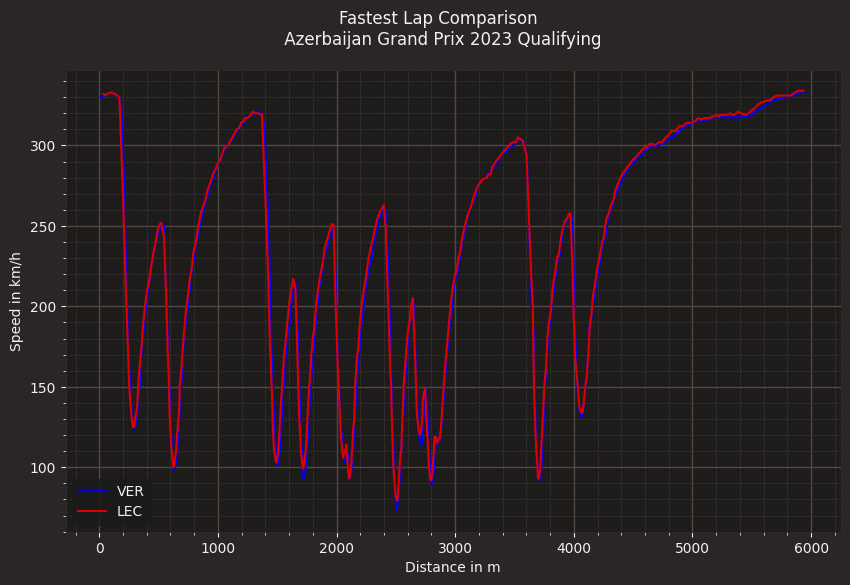

In [24]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color='#dc0000', label='LEC')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()